<a href="https://colab.research.google.com/github/Jayhubexp/Deep-Learning/blob/main/Computer_Vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision With tensorflow

## Get the data

> Got the data from food101 dataset but modified it to use just 2 classes as directed by mrdbourke - Deep Learning Tutor

- Link to his github:

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-12-04 01:10:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   138MB/s    in 0.8s    

2024-12-04 01:10:48 (138 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data (Become one with the data)
A very crucial step for any machine learning project is becoming one with the data

And for a Computer vision project, this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os
# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in'{dirpath}'")

There are 2 directories and 0 images in'pizza_steak'
There are 2 directories and 0 images in'pizza_steak/train'
There are 0 directories and 750 images in'pizza_steak/train/steak'
There are 0 directories and 750 images in'pizza_steak/train/pizza'
There are 2 directories and 0 images in'pizza_steak/test'
There are 0 directories and 250 images in'pizza_steak/test/steak'
There are 0 directories and 250 images in'pizza_steak/test/pizza'


In [ ]:
# Another way to find out the number of images in our file directory is:
num_steak = len(os.listdir("pizza_steak/train/steak"))
num_steak

750

# To Visualize our images, first let's get the class names programmatically.

In [ ]:
# Getting class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the target directory(we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img


['869763.jpg']
Image shape: (512, 384, 3)


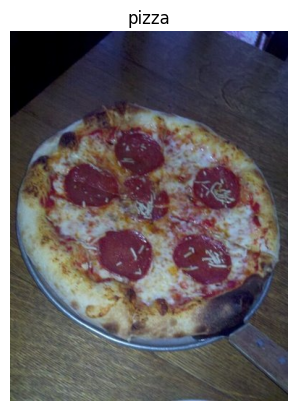

In [ ]:
# View a random image from the training dataset

img = view_random_image(target_dir= "pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  1,   1,   9],
        [  0,   0,   8],
        [  0,   0,   8],
        ...,
        [  1,   6,  36],
        [  1,   6,  35],
        [  2,   7,  36]],

       [[  0,   0,   8],
        [  0,   0,   8],
        [  0,   0,   8],
        ...,
        [  0,   5,  35],
        [  1,   6,  35],
        [  1,   6,  35]],

       [[  0,   1,   6],
        [  0,   1,   6],
        [  0,   1,   6],
        ...,
        [  0,   5,  35],
        [  0,   5,  34],
        [  0,   5,  34]],

       ...,

       [[ 85,  94,  65],
        [ 82,  91,  62],
        [ 83,  92,  65],
        ...,
        [ 49,  49,  39],
        [ 48,  48,  38],
        [ 47,  47,  37]],

       [[ 87,  96,  65],
        [ 90,  99,  68],
        [ 92, 101,  72],
        ...,
        [ 50,  50,  40],
        [ 49,  49,  39],
        [ 47,  47,  37]],

       [[ 84,  93,  62],
        [ 85,  94,  63],
        [ 86,  95,  66],
        ...,
        [ 50,  50,  4

In [ ]:
img/255

array([[[0.00392157, 0.00392157, 0.03529412],
        [0.        , 0.        , 0.03137255],
        [0.        , 0.        , 0.03137255],
        ...,
        [0.00392157, 0.02352941, 0.14117647],
        [0.00392157, 0.02352941, 0.1372549 ],
        [0.00784314, 0.02745098, 0.14117647]],

       [[0.        , 0.        , 0.03137255],
        [0.        , 0.        , 0.03137255],
        [0.        , 0.        , 0.03137255],
        ...,
        [0.        , 0.01960784, 0.1372549 ],
        [0.00392157, 0.02352941, 0.1372549 ],
        [0.00392157, 0.02352941, 0.1372549 ]],

       [[0.        , 0.00392157, 0.02352941],
        [0.        , 0.00392157, 0.02352941],
        [0.        , 0.00392157, 0.02352941],
        ...,
        [0.        , 0.01960784, 0.1372549 ],
        [0.        , 0.01960784, 0.13333333],
        [0.        , 0.01960784, 0.13333333]],

       ...,

       [[0.33333333, 0.36862745, 0.25490196],
        [0.32156863, 0.35686275, 0.24313725],
        [0.3254902 , 0

# An end-to-end example (CNN) Model

* Load our images
* preprocess our images
* Build CNN to find patterns
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set Seed
tf.random.set_seed(42)

# Preprocess Data
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#Import data directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size =(224,224),
                                               class_mode = "binary",
                                               seed =42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size =(224,224),
                                               class_mode = "binary",
                                               seed =42)

#Build a CNN model (Same as Tiny VGG on the CNN explainer website)
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size =2,
                              padding = "valid"),
   tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])

cnn_model.compile(loss= "binary_crossentropy",
                  optimizer= tf.keras.optimizers.Adam(),
                  metrics= ["accuracy"])

history_1 = cnn_model.fit(train_data,
                          epochs= 5,
                          steps_per_epoch = len(train_data),
                          validation_data = valid_data,
                          validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 242ms/step - accuracy: 0.6006 - loss: 0.6507 - val_accuracy: 0.8140 - val_loss: 0.4527
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7429 - loss: 0.5085 - val_accuracy: 0.8060 - val_loss: 0.4468
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.7956 - loss: 0.4480 - val_accuracy: 0.8560 - val_loss: 0.3713


In [ ]:
1500/32


46.875

In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

# Using a non-CNN model to train image dataset

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Creating a non CNN model
non_cnn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compiling the model
non_cnn_model.compile(loss= "binary_crossentropy",
                      optimizer= tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

# Fitting the model
history_2 = non_cnn_model.fit(train_data,
                              epochs= 5,
                          steps_per_epoch = len(train_data),
                          validation_data = valid_data,
                          validation_steps = len(valid_data))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.4992 - loss: 2.6798 - val_accuracy: 0.5020 - val_loss: 0.6919
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.4868 - loss: 0.6935 - val_accuracy: 0.5020 - val_loss: 0.6919
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.5020 - val_loss: 0.6919


In [ ]:
non_cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [ ]:
non_cnn_model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compiling the model
non_cnn_model_1.compile(loss= "binary_crossentropy",
                      optimizer= tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

# # Fitting the model
history_3 = non_cnn_model_1.fit(train_data,
                              epochs= 5,
                          steps_per_epoch = len(train_data),
                          validation_data = valid_data,
                          validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.5784 - loss: 4.4824 - val_accuracy: 0.6780 - val_loss: 0.7048
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.6504 - loss: 1.1095 - val_accuracy: 0.7200 - val_loss: 0.6560
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7168 - loss: 0.7271 - val_accuracy: 0.7860 - val_loss: 0.5157


## 1. Becoming one with the data

['2989882.jpg']
Image shape: (512, 512, 3)
['532970.jpg']
Image shape: (512, 512, 3)


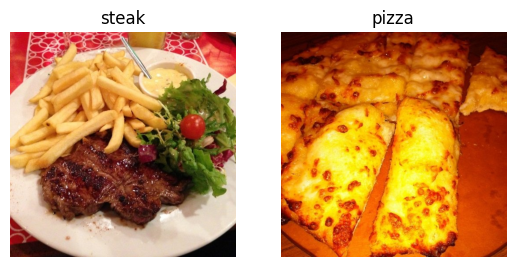

In [ ]:
# Visualize our data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
# Building a baseline model for the image dataset
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

base_model = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides=1,
           padding ="valid",
           activation="relu",
           input_shape =(224, 224,3)
    ),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
base_model.compile(loss="binary_crossentropy",
                   optimizer= Adam(),
                   metrics=["accuracy"])

history_4 = base_model.fit(train_data,
                              epochs= 5,
                          steps_per_epoch = len(train_data),
                          validation_data = valid_data,
                          validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 198ms/step - accuracy: 0.6085 - loss: 0.6649 - val_accuracy: 0.7660 - val_loss: 0.4758
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.8201 - loss: 0.4095 - val_accuracy: 0.8360 - val_loss: 0.3812
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.9048 - loss: 0.2490 - val_accuracy: 0.8440 - val_loss: 0.3853


In [ ]:
min_len = min(len(v) for v in history_4.history.values())
for key in history_4.history:
    history_4.history[key] = history_4.history[key][:min_len]


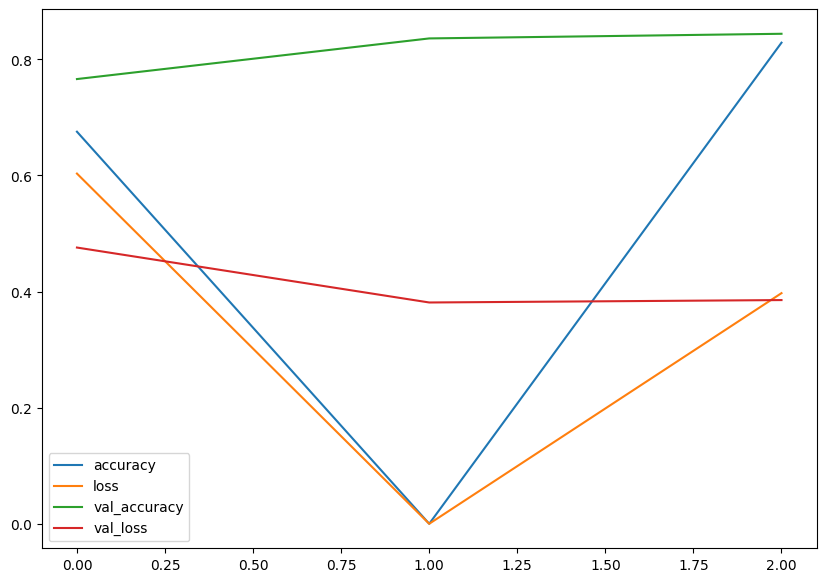

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

# Opening a bag of tricks (Said by Daniel, the instructor for this course) and finding data augmentation.

In [ ]:
#Create ImageDataGenerator training instance with data augmentation.
train_datagen_augmented = ImageDataGenerator(rescale= 1/255.0,
                                             rotation_range=0.2,
                                             shear_range=0.1,
                                             zoom_range=0.1,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

In [ ]:
# Import data from training directory and augment it
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size= 32,
                                                                   class_mode="binary",
                                                                   shuffle=False)


#Non augmented training data
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size =(224,224),
                                               class_mode = "binary",
                                               shuffle=False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.__next__()
augmented_images, augmented_labels = train_data_augmented.__next__()


showing the image number: 12


(-0.5, 223.5, 223.5, -0.5)

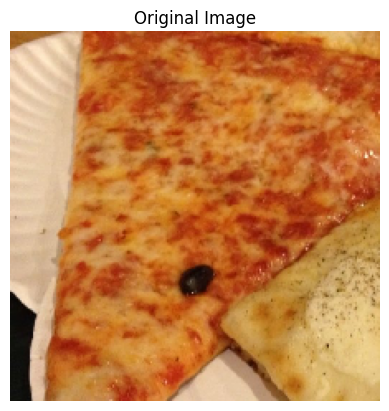

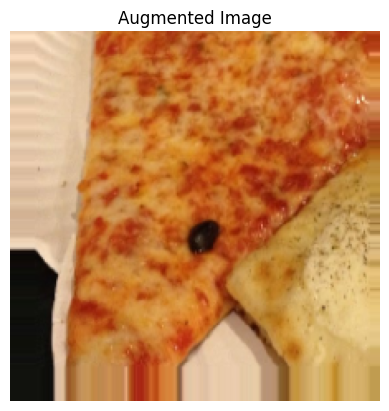

In [ ]:
import random
random_number = random.randint(0, 32)
print(f"showing the image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

# Multi-class Image Classification

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip.extractall()
zip.close()

--2024-12-04 01:16:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  68.9MB/s    in 7.3s    

2024-12-04 01:16:16 (67.8 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.

In [ ]:
# setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3732592.jpg']
Image shape: (512, 512, 3)


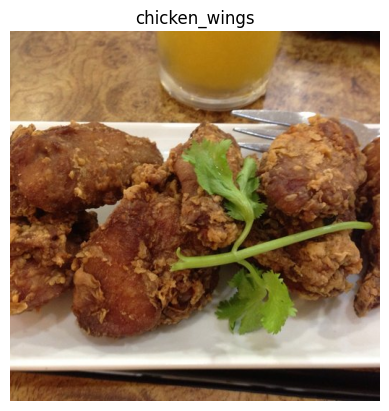

In [ ]:
import random
img = view_random_image(train_dir,
                        target_class=random.choice(class_names))